# PCA

In [2]:
# import notebook.services.api.handlers
import pandas as pd

import utils
# from models.VAE import *

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
# clustering namespaces
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.mixture import GaussianMixture

from statsmodels.multivariate.pca import PCA

import numpy as np
# import tensorflow_probability as tfp
# import tensorflow as tf
# from tensorflow.keras.callbacks import EarlyStopping
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, mean_squared_error
import seaborn as sns
from sklearn.manifold import TSNE
plt.rcParams['figure.figsize'] = (15, 12)
import warnings
warnings.filterwarnings('ignore')
save_dir = 'saved_models/tfp'

In [5]:
test_size = 0.2     # train-test split

# normal with subjective meassures = TRUE/FALSE
# dat, X_0, y_0, _, _, _, _ = load_data(group=group, test_size=test_size, sub=True) # subjectives = True
# dat, _, _, X, X_test, y, y_test = load_data(group=group, test_size=test_size, sub=False)

dat = pd.read_csv('../data/merged_male.csv')

y_0 = dat['LZ']
dat = dat.drop(['TalentID', 'AK', 'LZ'], axis=1).reset_index(drop=True)
X_0 = dat.iloc[:,:]


X, X_test, y, y_test = train_test_split(X_0, y_0, test_size=test_size, random_state=42, stratify=y_0)


X_0_names = list(X.columns)
X_names = ['relative_age', 'height', 'weight', 'SL20', 'GW','DR','BK','BJ','SKSC_TAK','SKSC_TEC','SKSC_KON','SKSC_PSY']
# ___ SCALING
df = X
scaler = StandardScaler().fit(X)
df = scaler.transform(df)

data = dat.copy()
scaler_data = StandardScaler().fit(data)
data = scaler_data.transform(data)

data = pd.DataFrame(data, columns=dat.columns)

# PCA

In [6]:
from sklearn.decomposition import PCA
#pca_scree = PCA(n_components = 0.75, svd_solver='full')
pca_scree = PCA(svd_solver='full')
pca_scree.fit(data)
reduced = pca_scree.transform(data)
data

,relative_age,height,weight,SL20,GW,DR,BK,BJ,SKSC_TAK,SKSC_TEC,SKSC_KON,SKSC_PSY
0,-0.948428,1.873996,1.119020,-0.370079,0.527551,-0.741615,-1.417041,0.488632,0.803709,-0.328371,0.278909,0.342178
1,0.474471,1.384259,1.233040,-0.723246,-1.034978,-0.423133,-1.394883,4.379016,-0.897609,-0.845168,-1.055583,-1.159984
2,0.032882,1.188364,2.601273,-2.388178,-1.694169,-1.843033,-1.394883,1.175170,2.261982,1.222020,0.278909,0.842898
3,-1.419456,2.363732,3.057351,-2.186368,-1.865071,-2.718860,-1.594310,2.548247,-0.411518,0.188426,-1.055583,-1.159984
4,-1.301699,2.069890,3.057351,-1.530486,-1.157050,-1.829763,-1.328407,2.777093,0.803709,0.188426,1.613402,0.342178
...,...,...,...,...,...,...,...,...,...,...,...,...
19172,-1.360578,-1.260321,-0.529638,0.235351,-0.766418,2.283967,0.828367,0.488632,2.018937,0.705223,0.278909,0.342178
19173,0.709986,0.208890,-0.529638,0.638971,1.259987,0.638475,0.673257,-0.426753,0.560664,0.188426,0.278909,0.342178
19174,0.023069,-0.084952,-0.529638,0.891233,1.992422,1.792974,2.320382,-0.197907,0.317618,0.188426,0.278909,0.342178
19175,-0.811044,0.992469,-0.257423,-0.773699,-1.889486,-1.922654,-0.818758,-0.426753,0.803709,0.705223,1.613402,0.342178


In [7]:
#pca_scree.explained_variance_ratio_
pca_scree.explained_variance_

array([3.49466493, 2.37824853, 1.32085736, 1.00431766, 0.9374688 ,
       0.6512617 , 0.55669771, 0.49793773, 0.36927415, 0.33376055,
       0.2358596 , 0.22027705])

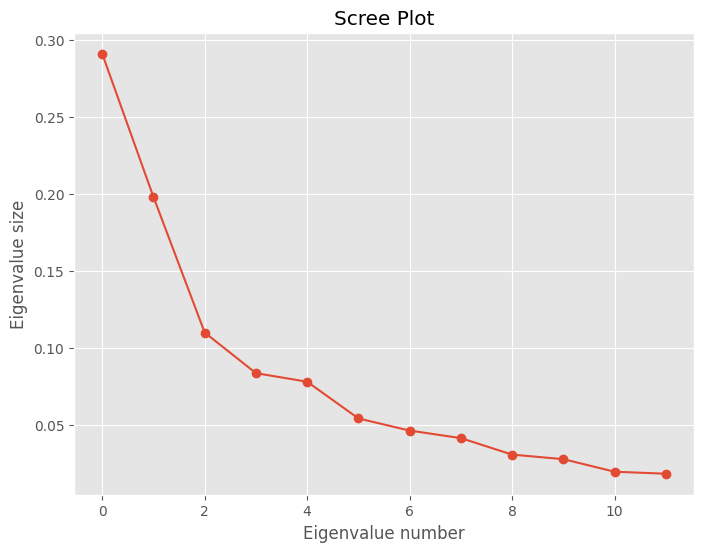

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.style.use("ggplot")
plt.plot(pca_scree.explained_variance_ratio_, marker='o')
plt.xlabel("Eigenvalue number")
plt.ylabel("Eigenvalue size")
plt.title("Scree Plot")
plt.show()

In [9]:
pca = PCA(n_components = 4, svd_solver='full',)
pca.fit(data)
reduced = pca.transform(data)
loadings = pd.DataFrame(pca.components_.T)

[Text(0.5, 1.0, 'PCA loadings (a)')]

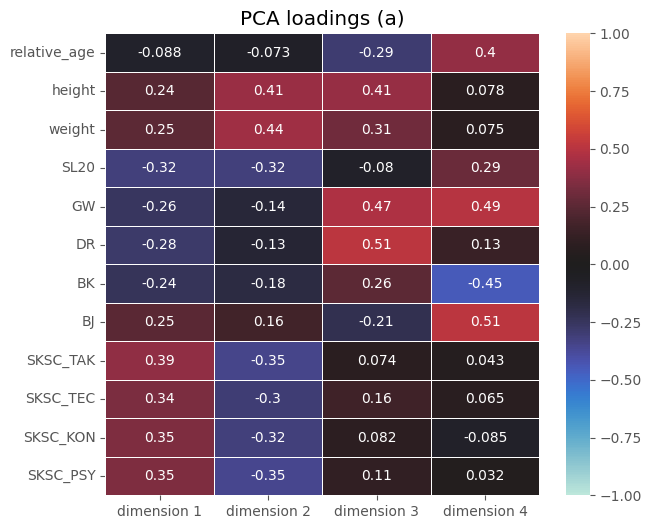

In [14]:
plt.subplots(figsize=(7,6))
sns.heatmap(data=loadings, annot=True, linewidths=0.5, vmin=-1, vmax=1, center=0,xticklabels=["dimension 1", "dimension 2","dimension 3","dimension 4"], yticklabels=X_names).set(title='PCA loadings (a)')

### Explained variance

In [15]:
np.sum(pca.explained_variance_ratio_)

np.float64(0.6831384161461131)